In [8]:
import sys
sys.path.append('../')

In [10]:
from modules.modules import VectorQuantizedVAE

In [26]:
import numpy as np
import torch

In [11]:
model = VectorQuantizedVAE(3, 256, 256)

In [14]:
model.load_state_dict(torch.load('../models/kylberg_k256//best.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [15]:
model.codebook

VQEmbedding(
  (embedding): Embedding(256, 256)
)

In [16]:
model.cpu()
model.eval()

VectorQuantizedVAE(
  (codebook): VQEmbedding(
    (embedding): Embedding(256, 256)
  )
  (encoder): Sequential(
    (0): Conv2d(3, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ResBlock(
      (block): Sequential(
        (0): ReLU(inplace)
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU(inplace)
        (4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (5): ResBlock(
      (block): Sequential(
        (0): ReLU(inplace)
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): BatchNo

In [17]:
img = torch.randint(0, 255, size=(10, 3, 64, 64), dtype=torch.float32) / 255.

In [18]:
out = model.encoder(img)
out.size()

torch.Size([10, 256, 16, 16])

In [19]:
out = model.encode(img)
out.size()

torch.Size([10, 16, 16])

In [20]:
out[0].max(), out[0].min()

(tensor(237), tensor(102))

In [21]:
out = model.decode(out)
out.size()

torch.Size([10, 3, 64, 64])

In [22]:
np_data = out.detach().numpy()

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def norm_img(x):
    h = x.copy()
    h -= h.min()
    h /= h.max()
    return h

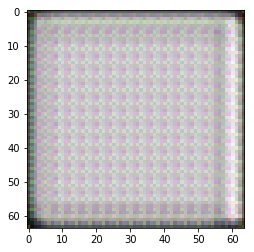

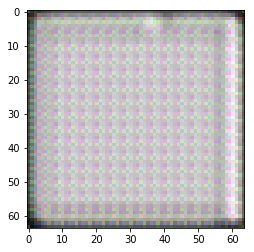

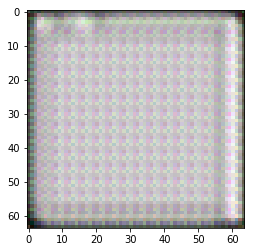

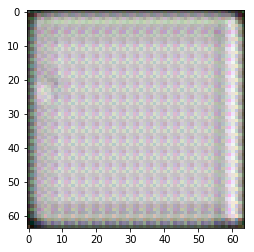

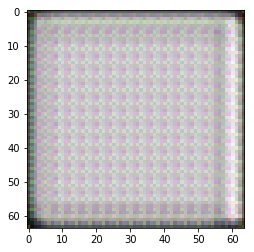

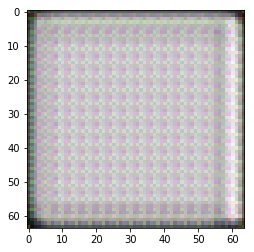

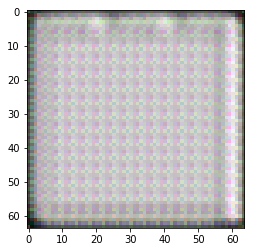

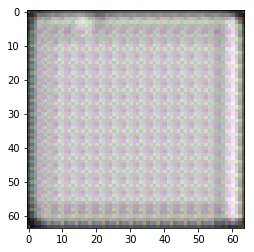

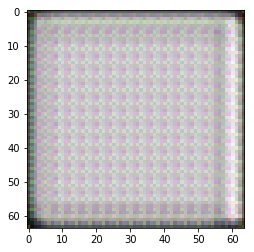

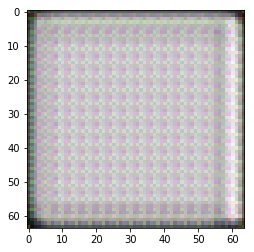

In [27]:
for i in np_data:
    tmp = np.transpose(norm_img(i), (1, 2, 0))
    plt.imshow(tmp)
    plt.show()

In [29]:
k = 256

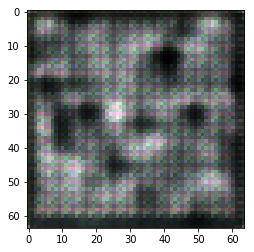

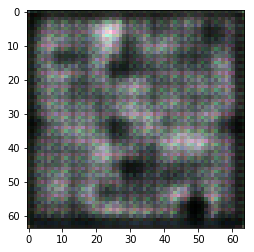

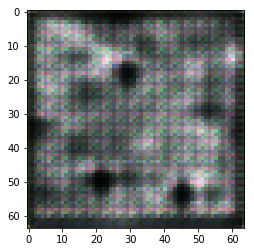

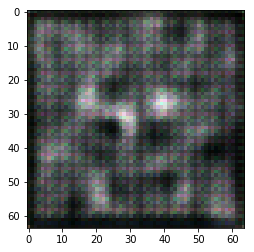

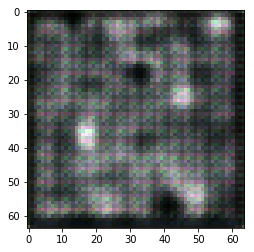

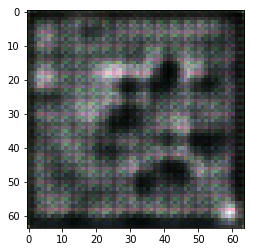

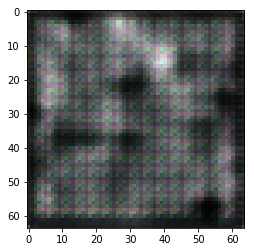

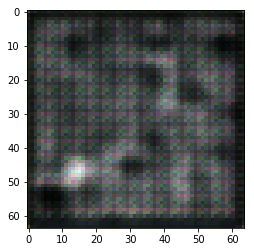

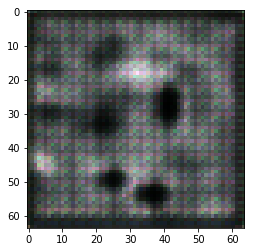

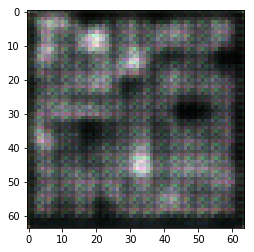

In [30]:
# latents = torch.ones((10, 16, 16)) * torch.arange(0, 100, 10, dtype=torch.float32).view(-1, 1, 1)
# latents = latents.long()
latents = torch.randint(k, (10, 16, 16))
np_data = model.decode(latents).detach().numpy()
for i in range(10):
    tmp = np.transpose(norm_img(np_data[i]), (1, 2, 0))
    plt.imshow(tmp)
    plt.show()

In [31]:
from datasets import datasets

In [34]:
dataset = datasets.get_dataset('kylberg', '~/dataset/kylberg')

In [35]:
train_dataset = dataset['train']
test_dataset = dataset['test']
valid_dataset = dataset['valid']
num_channels = dataset['num_channels']

In [36]:
len(train_dataset)

3584

In [37]:
len(test_dataset)

896

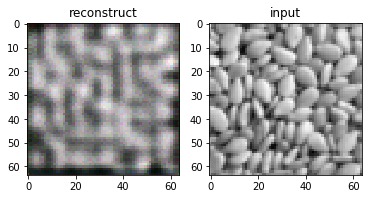

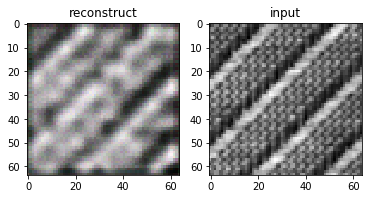

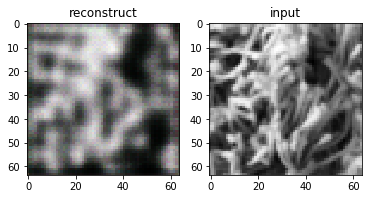

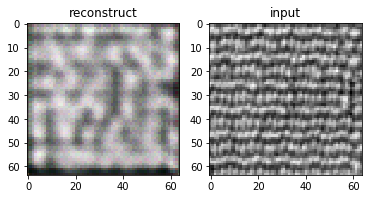

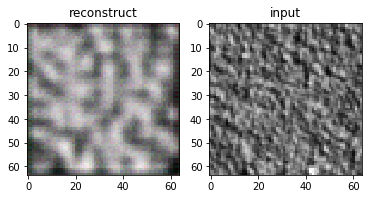

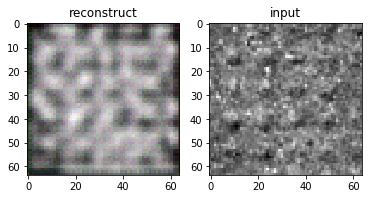

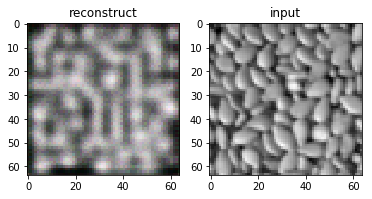

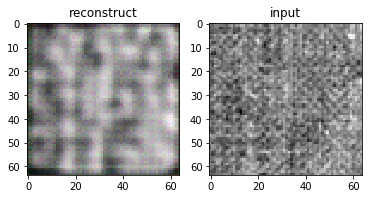

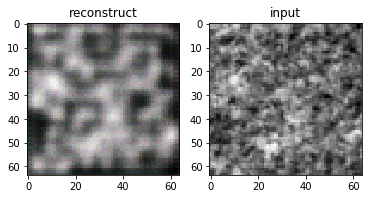

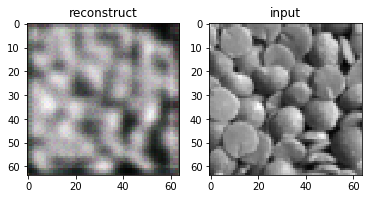

In [39]:
img = [test_dataset[i][0] for i in np.random.permutation(len(test_dataset))[:10]]
img = torch.stack(img)
out = model.encode(img)
out = model.decode(out)
np_data = out.detach().numpy()
for cnt, i in enumerate(np_data):
    tmp = np.transpose(norm_img(i), (1, 2, 0))
    plt.subplot(1, 2, 1)
    plt.title('reconstruct')
    plt.imshow(tmp)
    plt.subplot(1, 2, 2)
    tmp = np.transpose(norm_img(img[cnt].numpy()), (1, 2, 0))
    plt.title('input')
    plt.imshow(tmp)
    plt.show()